In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei'] # 中文显示

In [69]:
lianjia_df = pd.read_csv('data/lianjia.csv')
lianjia_df.head()

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


In [70]:
# 检查缺失值情况
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [71]:
lianjia_df.describe() # 看下统计分布

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


In [72]:
# 添加新特征房屋均价
df = lianjia_df.copy()
df['PerPrice'] = lianjia_df['Price']/lianjia_df['Size']
# 调整列顺序
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year', 'Size', 'Elevator', 'Direction', 'Renovation', 'PerPrice', 'Price']
df = pd.DataFrame(df, columns = columns)
df.head()

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.400000,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.750000,705.0
2,东城,崇文门,新世界中心,3室1厅,16,1996,210.0,有电梯,南西,其他,6.666667,1400.0
3,东城,崇文门,兴隆都市馨园,1室1厅,7,2004,39.0,NaN,南,精装,10.769231,420.0
4,东城,陶然亭,中海紫御公馆,2室2厅,19,2010,90.0,有电梯,南,精装,11.088889,998.0


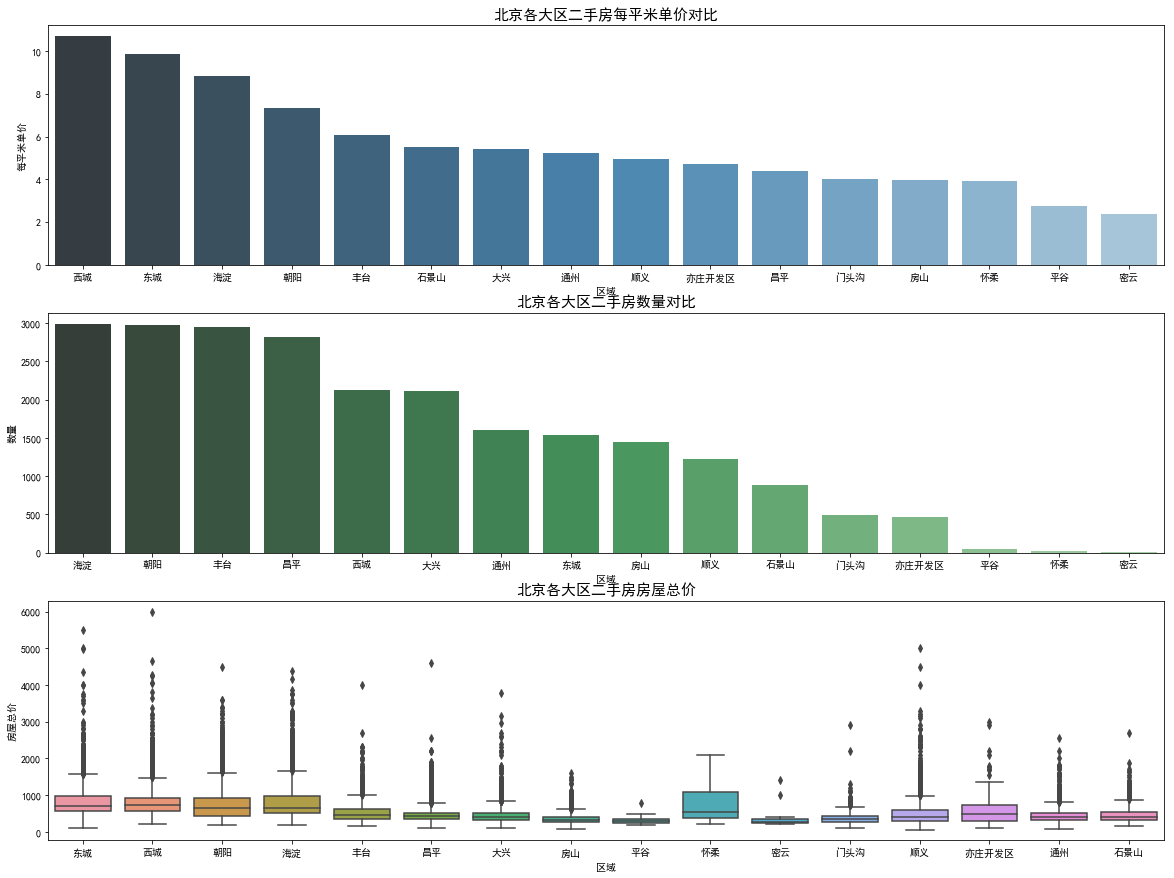

In [73]:
# 对二手房区域分组对比二手房数量和每平米房价
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['PerPrice'].mean().sort_values(ascending=False).to_frame().reset_index()
# 准备绘图
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(20,15))
sns.barplot(x='Region', y='PerPrice', palette="Blues_d", data=df_house_mean, ax=ax1)
ax1.set_title('北京各大区二手房每平米单价对比',fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='Region', y='Price', palette="Greens_d", data=df_house_count, ax=ax2)
ax2.set_title('北京各大区二手房数量对比',fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='Region', y='Price', data=df, ax=ax3)
ax3.set_title('北京各大区二手房房屋总价',fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.show()

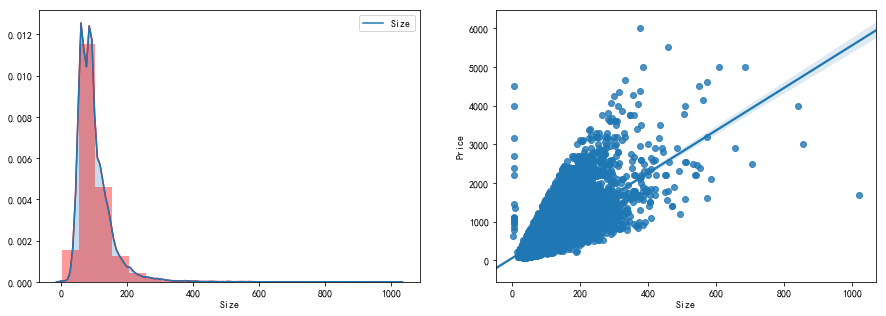

In [74]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
# 面积的分布情况
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['Size'], shade=True, ax=ax1)
# 面积和出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)
plt.show()

In [75]:
df.loc[df['Size']< 10]

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
1168,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,240.97平米,南北,216.000000,1080.0
1458,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,242.78平米,南北,220.000000,1100.0
1797,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,精装,242.96平米,南北,196.000000,980.0
2268,顺义,顺义其它,龙湖好望山,叠拼别墅,4,2014,4.0,精装,295.88平米,南北,250.000000,1000.0
2274,顺义,顺义其它,鹭峯国际,叠拼别墅,4,2014,5.0,精装,295.01平米,南北,290.000000,1450.0
2276,顺义,顺义其它,龙湖好望山,叠拼别墅,3,2014,4.0,毛坯,292.31平米,南北,215.000000,860.0
2432,顺义,顺义其它,龙湖好望山,叠拼别墅,5,2013,6.0,精装,294.42平米,南北,163.333333,980.0
4078,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,4.0,精装,427.5平米,南北,787.500000,3150.0
4079,大兴,西红门,鸿坤林语墅,叠拼别墅,4,2015,4.0,精装,361.8平米,南北,595.000000,2380.0
4761,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,5.0,精装,386.83平米,南北,540.000000,2700.0


In [76]:
tmp_df = df[df['Layout']=='叠拼别墅']
tmp_df['Size'] = tmp_df['Direction']
tmp_df['Size'] = tmp_df['Size'].apply(lambda s: float(s[:s.find('平米')]))
df.update(tmp_df)
df[df['Layout']=='叠拼别墅']

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
1168,房山,长阳,世茂维拉,叠拼别墅,5.0,2015.0,240.97,毛坯,240.97平米,南北,216.000000,1080.0
1458,房山,长阳,世茂维拉,叠拼别墅,5.0,2015.0,242.78,毛坯,242.78平米,南北,220.000000,1100.0
1797,房山,长阳,世茂维拉,叠拼别墅,5.0,2015.0,242.96,精装,242.96平米,南北,196.000000,980.0
2268,顺义,顺义其它,龙湖好望山,叠拼别墅,4.0,2014.0,295.88,精装,295.88平米,南北,250.000000,1000.0
2274,顺义,顺义其它,鹭峯国际,叠拼别墅,4.0,2014.0,295.01,精装,295.01平米,南北,290.000000,1450.0
2276,顺义,顺义其它,龙湖好望山,叠拼别墅,3.0,2014.0,292.31,毛坯,292.31平米,南北,215.000000,860.0
2432,顺义,顺义其它,龙湖好望山,叠拼别墅,5.0,2013.0,294.42,精装,294.42平米,南北,163.333333,980.0
4078,大兴,西红门,鸿坤林语墅,叠拼别墅,3.0,2015.0,427.5,精装,427.5平米,南北,787.500000,3150.0
4079,大兴,西红门,鸿坤林语墅,叠拼别墅,4.0,2015.0,361.8,精装,361.8平米,南北,595.000000,2380.0
4761,大兴,西红门,鸿坤林语墅,叠拼别墅,3.0,2015.0,386.83,精装,386.83平米,南北,540.000000,2700.0


In [79]:
df.info()
# Size          23677 non-null object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Region        23677 non-null object
District      23677 non-null object
Garden        23677 non-null object
Layout        23677 non-null object
Floor         23677 non-null float64
Year          23677 non-null float64
Size          23677 non-null object
Elevator      15440 non-null object
Direction     23677 non-null object
Renovation    23677 non-null object
PerPrice      23677 non-null float64
Price         23677 non-null float64
dtypes: float64(4), object(8)
memory usage: 2.2+ MB


In [78]:
df.loc[df['Size']>1000]

TypeError: '>' not supported between instances of 'str' and 'int'

In [64]:
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)] # 过滤不正常面积

In [65]:
for x in df["Size"]:
    if not isinstance(x, float):
        print(x)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23656 entries, 0 to 23676
Data columns (total 12 columns):
Region        23656 non-null object
District      23656 non-null object
Garden        23656 non-null object
Layout        23656 non-null object
Floor         23656 non-null float64
Year          23656 non-null float64
Size          23656 non-null float64
Elevator      15419 non-null object
Direction     23656 non-null object
Renovation    23656 non-null object
PerPrice      23656 non-null float64
Price         23656 non-null float64
dtypes: float64(5), object(7)
memory usage: 2.3+ MB


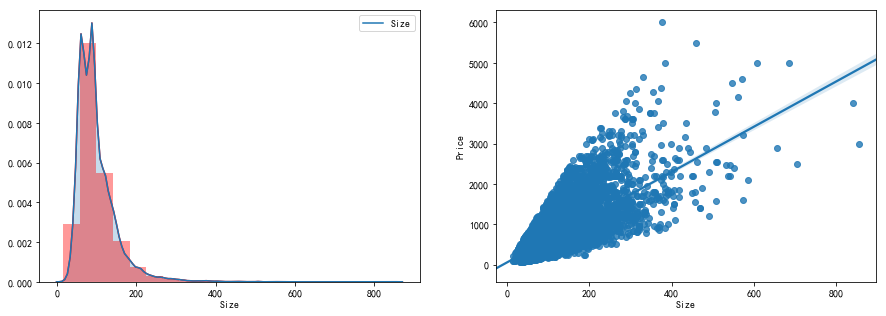

In [67]:
# 重新可视化
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
# 建房时间的分布情况
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['Size'], shade=True, ax=ax1)
# 建房时间和出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)
plt.show()

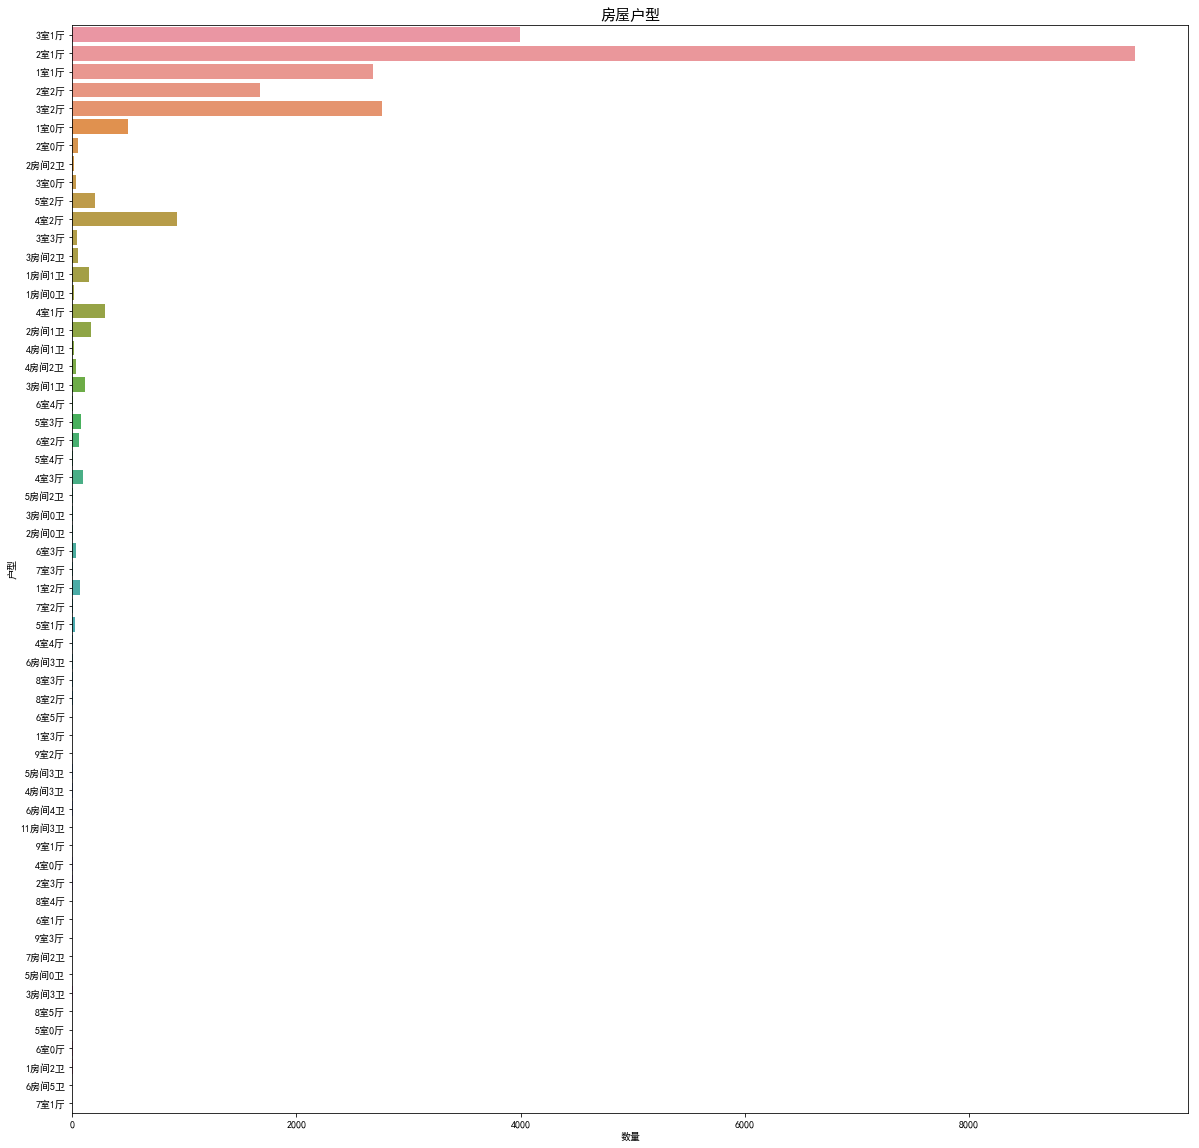

In [13]:
# 户型特征分析
# 但是仔细观察特征分类下有很多不规则的命名，比如2室一厅与2房间1卫，还有别墅，没有统一的叫法。
# 这样的特征肯定是不能作为机器学习模型的数据输入的，需要使用特征工程进行相应的处理。
f, ax1= plt.subplots(figsize=(20,20))
sns.countplot(y='Layout', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()

In [14]:
# 装修特征
df['Renovation'].value_counts()

精装    11345
简装     8496
其他     3239
毛坯      576
Name: Renovation, dtype: int64

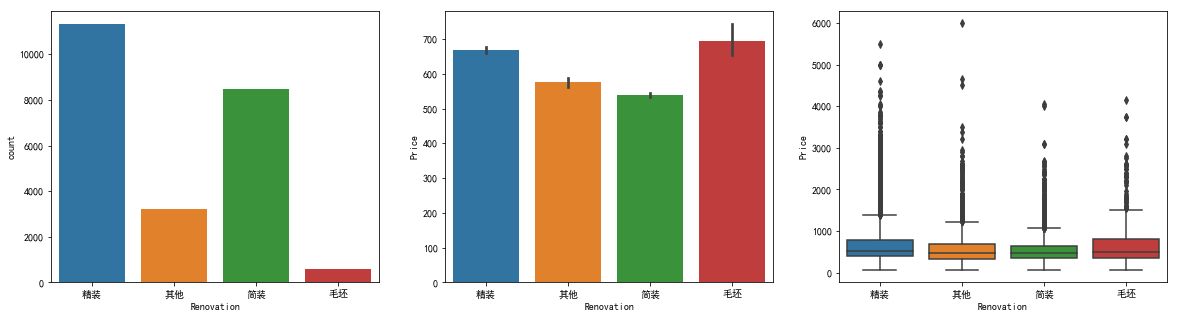

In [15]:
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(df['Renovation'], ax=ax1)
sns.barplot(x='Renovation', y='Price', data=df, ax=ax2)
sns.boxplot(x='Renovation', y='Price', data=df, ax=ax3)
plt.show()

In [16]:
# 分析电梯
misn = len(df.loc[(df['Elevator'].isnull()), 'Elevator'])
print('Elevator缺失值数量为：'+ str(misn))

Elevator缺失值数量为：8237


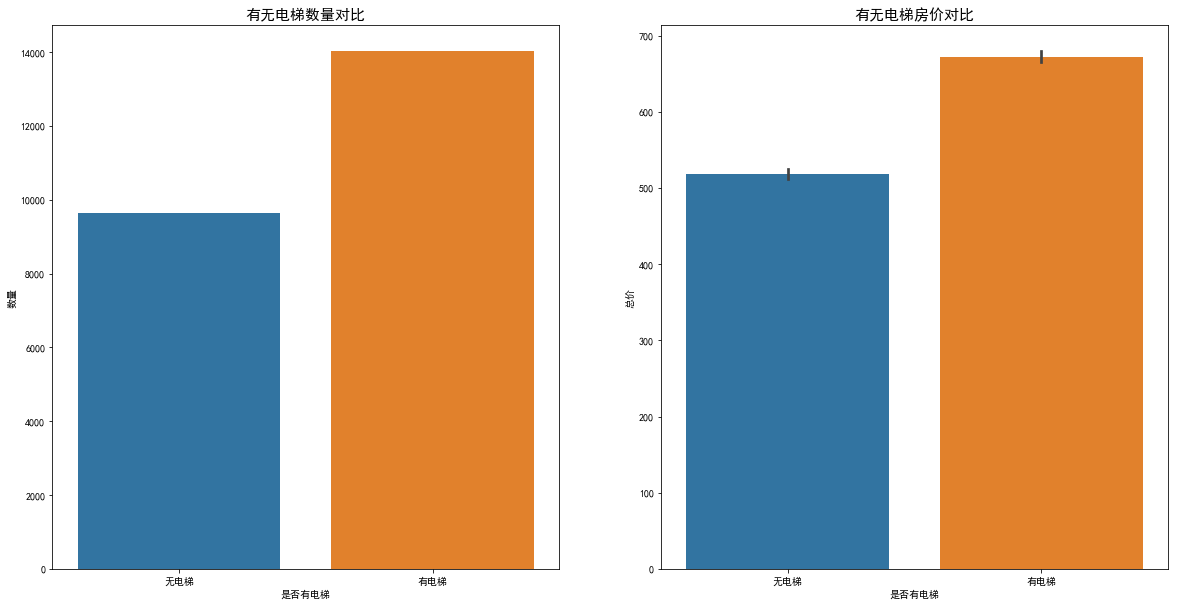

In [17]:
# 考虑填补法，但是有无电梯不是数值，不存在平均值和中位数，怎么填补呢？
# 这里给大家提供一种思路：就是根据楼层 Floor 来判断有无电梯。
# 一般的楼层大于6的都有电梯，而小于等于6层的一般都没有电梯。有了这个标准，那么剩下的就简单了。
df['Elevator'] = df.loc[(df['Elevator'] == '有电梯')|(df['Elevator'] == '无电梯'), 'Elevator']
# 填补Elevator缺失值
df.loc[(df['Floor']>6)&(df['Elevator'].isnull()), 'Elevator'] = '有电梯'
df.loc[(df['Floor']<=6)&(df['Elevator'].isnull()), 'Elevator'] = '无电梯'
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(df['Elevator'], ax=ax1)
ax1.set_title('有无电梯数量对比',fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')
sns.barplot(x='Elevator', y='Price', data=df, ax=ax2)
ax2.set_title('有无电梯房价对比',fontsize=15)
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')
plt.show()

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


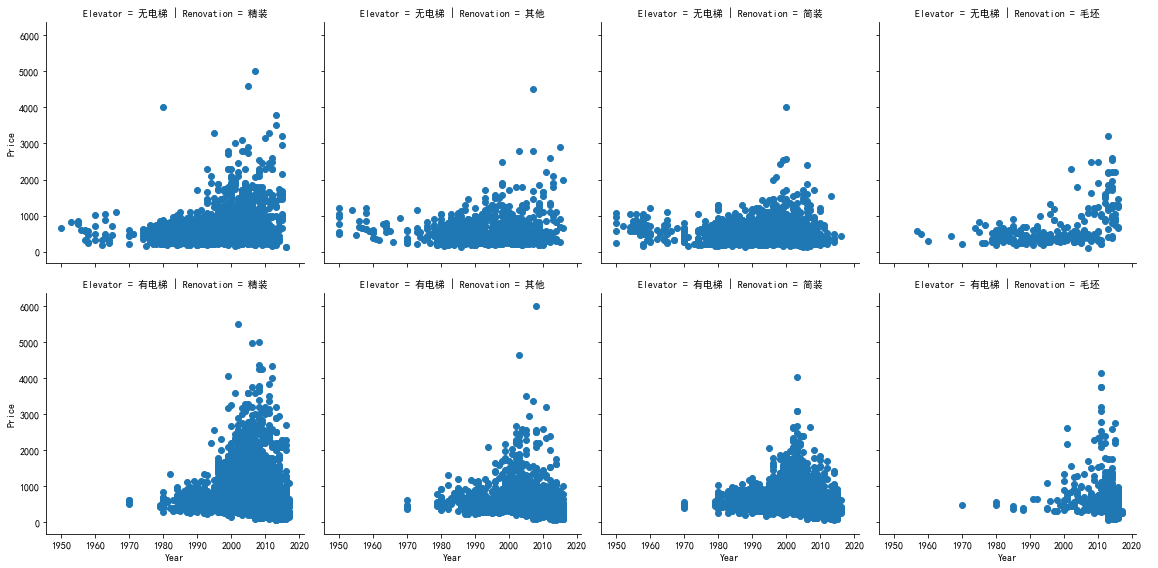

In [18]:
# 年代分析
grid = sns.FacetGrid(df, row='Elevator', col='Renovation', palette='seismic',size=4)
grid.map(plt.scatter, 'Year', 'Price')
grid.add_legend()
# 结论
# 整个二手房房价趋势是随着时间增长而增长的；
# 2000年以后建造的二手房房价相较于2000年以前有很明显的价格上涨；
# 1980年之前几乎不存在有电梯二手房数据，说明1980年之前还没有大面积安装电梯；
# 1980年之前无电梯二手房中，简装二手房占绝大多数，精装反而很少；

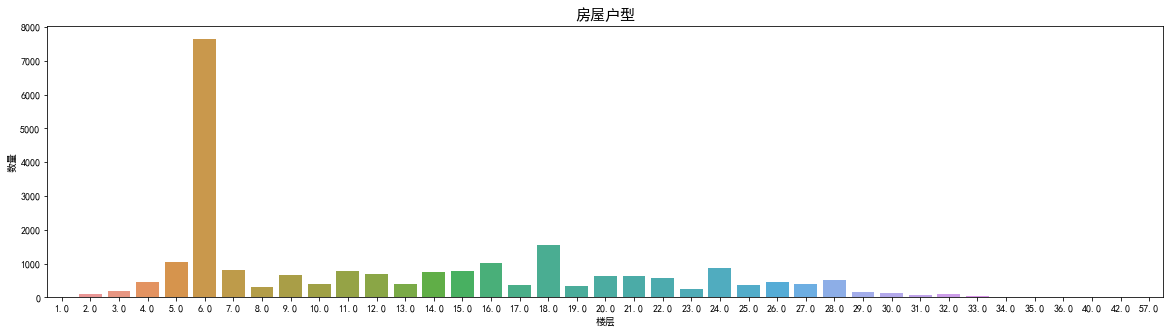

In [19]:
# 楼层分析
f, ax1= plt.subplots(figsize=(20,5))
sns.countplot(x='Floor', data=df, ax=ax1)
ax1.set_title('房屋户型',fontsize=15)
ax1.set_xlabel('楼层')
ax1.set_ylabel('数量')
plt.show()